# PM 2.5 Air Pollution ML model for Regression Problem

***~by Devesh*** **Verma**

**Step 1 : Data Preprocessing**

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
air=files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31 (2).csv


In [2]:
#read csv file
air=df=pd.read_csv("https://raw.githubusercontent.com/STAT547-UBC-2019-20/group_12_qiyangqd_xiaoyuanf/master/data/raw_data.csv")

In [3]:
air.isnull().sum()

Unnamed: 0       0
No               0
year             0
month            0
day              0
hour             0
pm2.5         2067
DEWP             0
TEMP             0
PRES             0
cbwd             0
Iws              0
Is               0
Ir               0
dtype: int64

In [4]:
air['pm2.5'].fillna(air[ "pm2.5"].mean(),inplace=True)

In [5]:
air.head()

,Unnamed: 0,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
2,3,3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
3,4,4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
4,5,5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df.tail()

,Unnamed: 0,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [7]:
df.isnull().sum()

Unnamed: 0    0
No            0
year          0
month         0
day           0
hour          0
pm2.5         0
DEWP          0
TEMP          0
PRES          0
cbwd          0
Iws           0
Is            0
Ir            0
dtype: int64

In [8]:
air.shape

(43824, 14)

In [9]:
air.columns

Index(['Unnamed: 0', 'No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP',
       'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [10]:
air.dtypes

Unnamed: 0      int64
No              int64
year            int64
month           int64
day             int64
hour            int64
pm2.5         float64
DEWP            int64
TEMP          float64
PRES          float64
cbwd           object
Iws           float64
Is              int64
Ir              int64
dtype: object

In [29]:
# Encoding categorical variable
cat_values=[]
cont_values=[]
for columns in air.columns:
    if air[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)

In [30]:
cat_values

['year', 'cbwd']

In [31]:
cont_values

['Unnamed: 0',
 'No',
 'month',
 'day',
 'hour',
 'pm2.5',
 'DEWP',
 'TEMP',
 'PRES',
 'Iws',
 'Is',
 'Ir']

In [25]:
air['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [38]:
air1=df1=pd.get_dummies(air,columns=cat_values,drop_first=True)

In [39]:
air1.head()

,Unnamed: 0,No,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
0,1,1,1,1,0,98.613215,-21,-11.0,1021.0,1.79,0,0,0,0,0,0,1,0,0
1,2,2,1,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0,0,0,0,0,1,0,0
2,3,3,1,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0,0,0,0,0,1,0,0
3,4,4,1,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0,0,0,0,0,1,0,0
4,5,5,1,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0,0,0,0,0,1,0,0


**Step 2 : Exploratory Data Analysis (EDA)**

In [40]:
air1.describe()

,Unnamed: 0,No,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,21912.500000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916,0.199890,0.200438,0.199890,0.199890,0.322882,0.348896,0.214198
std,12651.043435,12651.043435,3.448572,8.799425,6.922266,89.853296,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867,0.399922,0.400333,0.399922,0.399922,0.467584,0.476626,0.410269
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10956.750000,10956.750000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21912.500000,21912.500000,7.000000,16.000000,11.500000,77.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32868.250000,32868.250000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,43824.000000,43824.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


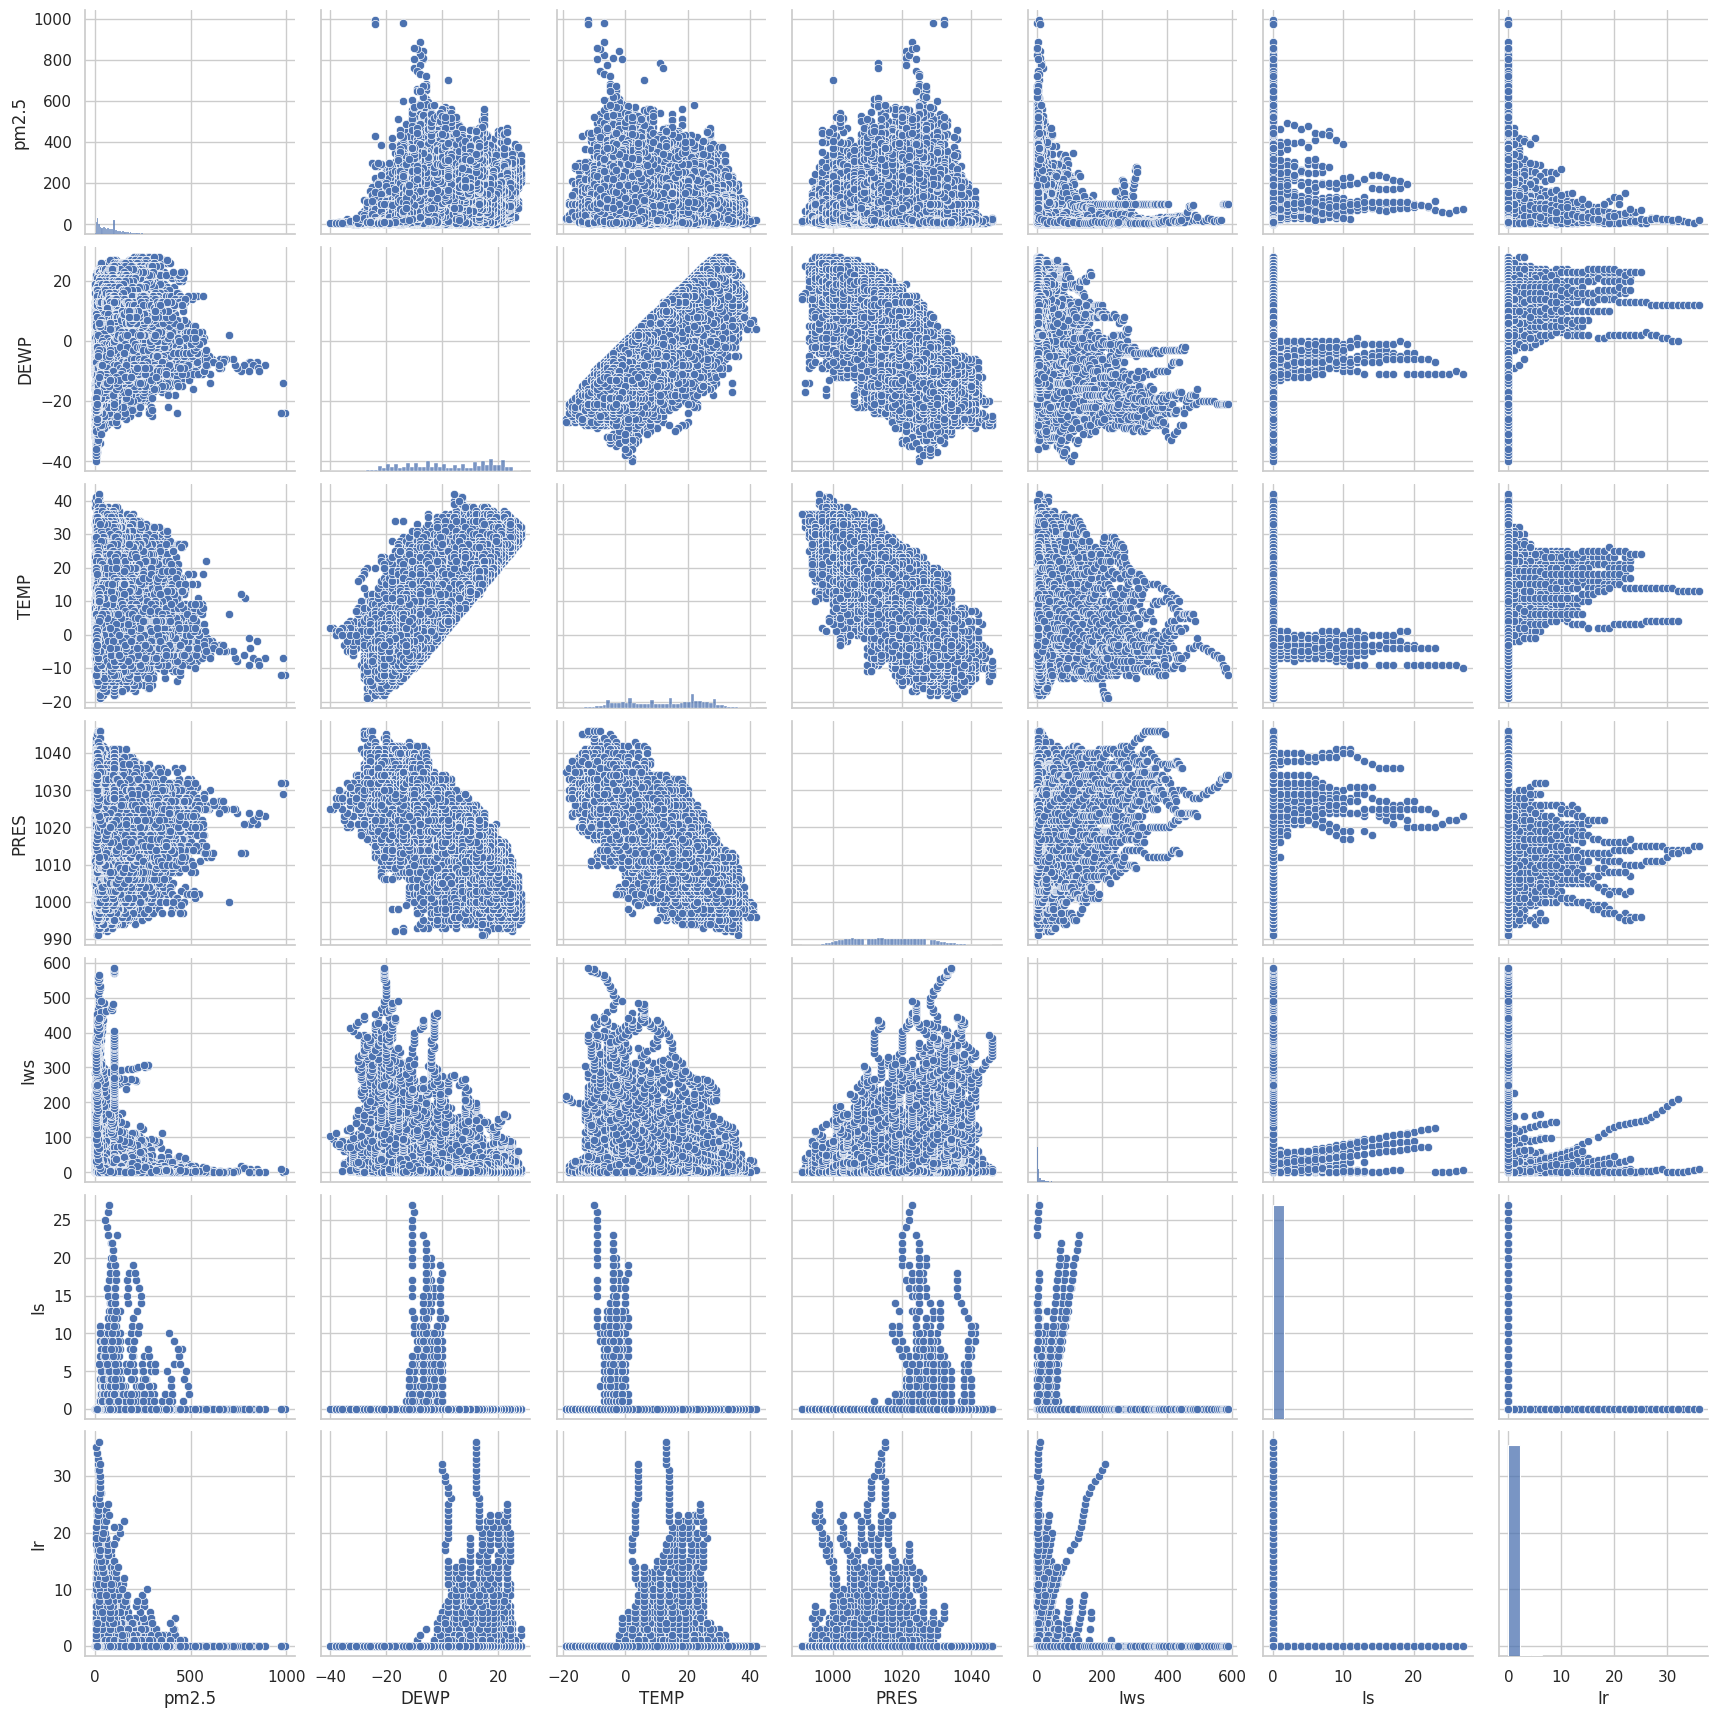

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Pairplot to visualize relationships between numeric variables
sns.pairplot(df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])
plt.show()

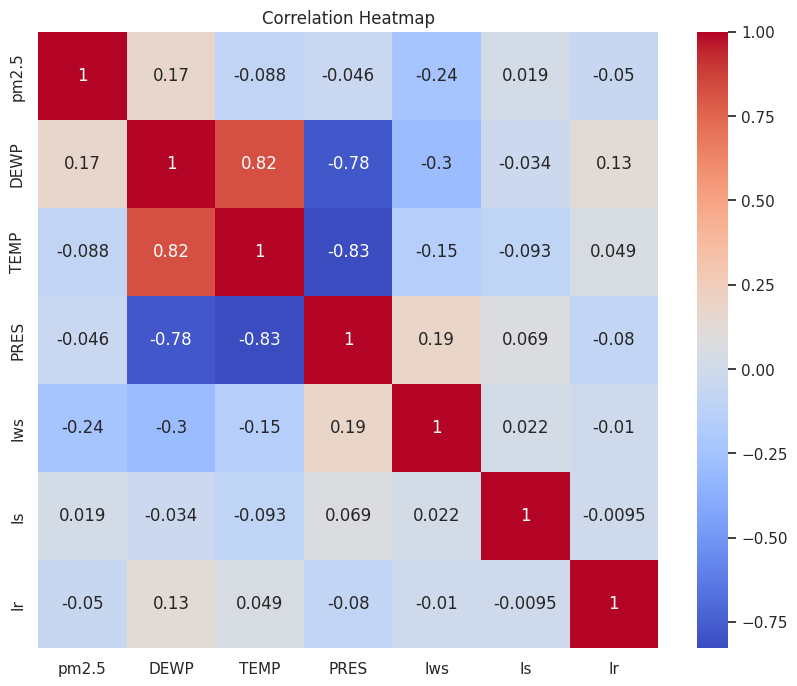

In [ ]:
# Heatmap to visualize correlations between numeric variables
correlation_matrix = df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

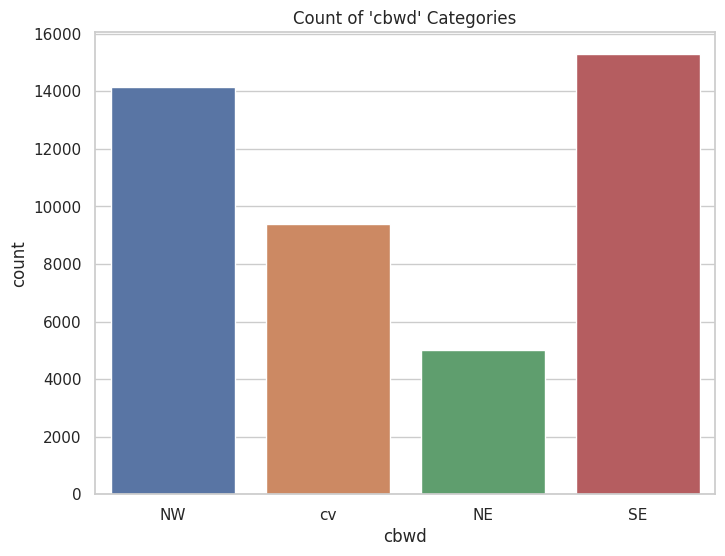

In [ ]:
# Countplot for the 'cbwd' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cbwd')
plt.title("Count of 'cbwd' Categories")
plt.show()

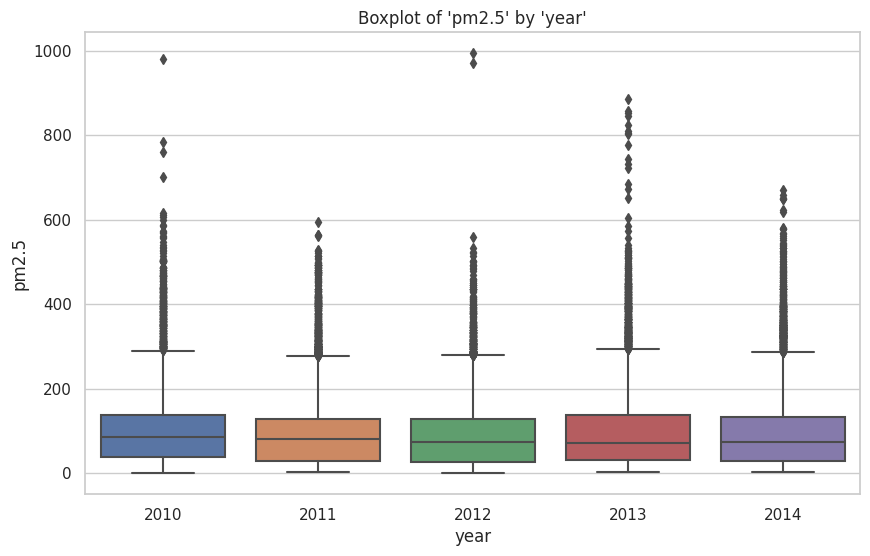

In [ ]:
# Boxplot for 'pm2.5' by 'year'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='pm2.5')
plt.title("Boxplot of 'pm2.5' by 'year'")
plt.show()

# **Model Implementation**

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [66]:
X=df1.drop('pm2.5',axis=1)
y_test=df1['pm2.5']

In [67]:
# ## Assuming 'X' contains features and 'y' contains target variable 'pm2.5'
# X = df1[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]
# y = df1['pm2.5']


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply consistent data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [70]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)

(35059, 12)
(8765, 12)


**# Ridge Regressor**

In [71]:
RR = Ridge(alpha=0.1)
RR.fit(X_train,y_train)
predicted_train_RR=(RR.predict(X_train))
predicted_test_RR=(RR.predict(X_test))

In [72]:
print(" Train Dataset ")
print(" Mean absolute error :    ",mean_absolute_error(y_train,predicted_train_RR))
print(" Mean squared error  :    ",mean_squared_error(y_train,predicted_train_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_train,predicted_train_RR)))

 Train Dataset 
 Mean absolute error :     56.73177541330302
 Mean squared error  :     6109.890939232997
 Root mean squared error:  78.16579136190586


In [73]:
print(" Test Dataset ")
print(" Mean absolute error :    ",mean_absolute_error(y_test,predicted_test_RR))
print(" Mean squared error :     ",mean_squared_error(y_test,predicted_test_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_test,predicted_test_RR)))

 Test Dataset 
 Mean absolute error :     56.50614194243222
 Mean squared error :      5982.9008720486
 Root mean squared error:  77.349213777831


**Random forest**

In [74]:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=7,
                            max_features='auto',
                            min_samples_split=7,
                            min_samples_leaf=3)
rfr.fit(X_train,y_train)
y_train_predict_rfr = rfr.predict(X_train)
y_test_predict_rfr = rfr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [75]:
mse = metrics.mean_squared_error(y_test,y_test_predict_rfr)
r2 = metrics.r2_score(y_test,y_test_predict_rfr)

print(np.sqrt(mse))
print(r2)

64.53675583079013
0.47532198573949835


In [78]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(y_train,y_train_predict_rfr))
print(" Mean squared error :     ",mean_squared_error(y_train,y_train_predict_rfr))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_train,y_train_predict_rfr)))

 Training DataSet 
 Mean absolute error :     45.54992234028139
 Mean squared error :      4068.805821273
 Root mean squared error:  63.78719167100085


In [79]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(y_test,y_test_predict_rfr))
print(" Mean squared error :     ",mean_squared_error(y_test,y_test_predict_rfr))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_test_predict_rfr)))

 Testing DataSet 
 Mean absolute error :     46.34462105193467
 Mean squared error :      4164.992853163024
 Root mean squared error:  64.53675583079013


**Overfitting and Cross validation**

In [81]:
print(" Accuracy on training data set")
print(" Accuracy on Ridge Regressor training data set :         ",RR.score(X_train,y_train))
print(" Accuracy on Random Forest Regressor training data set : ",rfr.score(X_train,y_train))
acc_rr_train  = RR.score(X_train,y_train)
acc_rfr_train =rfr.score(X_train,y_train)

 Accuracy on training data set
 Accuracy on Ridge Regressor training data set :          0.24636532357591168
 Accuracy on Random Forest Regressor training data set :  0.4981263677134533


In [82]:
print(" Accuracy on test data set")
print(" Accuracy on Ridge Regressor test data set :         ",RR.score(X_test,y_test))
print(" Accuracy on Random Forest Regressor test data set : ",rfr.score(X_test,y_test))
acc_rr_test=RR.score(X_test,y_test)
acc_rfr_test=rfr.score(X_test,y_test)

 Accuracy on test data set
 Accuracy on Ridge Regressor test data set :          0.2463140610961777
 Accuracy on Random Forest Regressor test data set :  0.47532198573949835


In [83]:
if acc_rr_train > acc_rr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS NOT OVERFITTED!


In [84]:
if acc_rfr_train > acc_rfr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS NOT OVERFITTED!


In [ ]:
from google.colab import files

# path to .pkl file
file_path = '/content/air-pm2.5.pkl'  # Replace with the actual file path

# Use the files.download() function to trigger the download
files.download(file_path)


In [89]:
import joblib
joblib.dump(rfr,"Air_Pollution_model.pkl")

['Air_Pollution_model.pkl']

In [90]:
model = joblib.load("Air_Pollution_model.pkl")